In [1]:
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
import keras

Using TensorFlow backend.


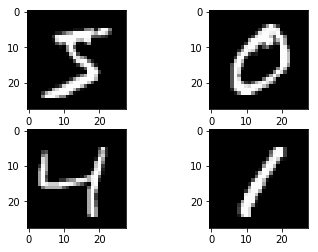

In [4]:


# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2793 - acc: 0.9208 - val_loss: 0.1412 - val_acc: 0.9571
Epoch 2/10
 - 6s - loss: 0.1119 - acc: 0.9674 - val_loss: 0.0917 - val_acc: 0.9706
Epoch 3/10
 - 6s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0776 - val_acc: 0.9770
Epoch 4/10
 - 5s - loss: 0.0502 - acc: 0.9860 - val_loss: 0.0747 - val_acc: 0.9771
Epoch 5/10
 - 5s - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0679 - val_acc: 0.9787
Epoch 6/10
 - 6s - loss: 0.0267 - acc: 0.9930 - val_loss: 0.0622 - val_acc: 0.9804
Epoch 7/10
 - 6s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0605 - val_acc: 0.9817
Epoch 8/10
 - 6s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0624 - val_acc: 0.9813
Epoch 9/10
 - 6s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0574 - val_acc: 0.9817
Epoch 10/10
 - 6s - loss: 0.0081 - acc: 0.9984 - val_loss: 0.0595 - val_acc: 0.9809
Baseline Error: 1.91%


In [14]:
import os
os.chdir('C:\\Users\\Elishama\\Desktop\\AI Saturday IFE\\Deep learning\\simply keras')

In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(784, 784) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32_ref>]

In [ ]:
import os, sys
directory = os.getcwd()
new_directory = directory + '\\test_images'
os.chdir(new_directory)
os.getcwd()


import pandas as pd
test_data = pd.DataFrame(y_test)
test_data.to_csv('test_target.csv')


test_info = pd.DataFrame(X_test)
test_info.to_csv('test_data.csv')

In [13]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


In [14]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [15]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [16]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [18]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 121s - loss: 0.2225 - acc: 0.9366 - val_loss: 0.0788 - val_acc: 0.9750
Epoch 2/10
 - 119s - loss: 0.0711 - acc: 0.9788 - val_loss: 0.0459 - val_acc: 0.9848
Epoch 3/10
 - 120s - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0447 - val_acc: 0.9857
Epoch 4/10
 - 121s - loss: 0.0392 - acc: 0.9880 - val_loss: 0.0405 - val_acc: 0.9875
Epoch 5/10
 - 120s - loss: 0.0324 - acc: 0.9899 - val_loss: 0.0347 - val_acc: 0.9884
Epoch 6/10
 - 119s - loss: 0.0267 - acc: 0.9917 - val_loss: 0.0334 - val_acc: 0.9891
Epoch 7/10
 - 123s - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 8/10
 - 123s - loss: 0.0191 - acc: 0.9939 - val_loss: 0.0337 - val_acc: 0.9882
Epoch 9/10
 - 122s - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0339 - val_acc: 0.9892
Epoch 10/10
 - 121s - loss: 0.0143 - acc: 0.9956 - val_loss: 0.0308 - val_acc: 0.9902
CNN Error: 0.98%


In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


In [ ]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# For custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])